**Build a CNN model for Bird species**

Bird species classification is the process of using machine learning and computer vision techniques to identify and categorize different species of birds based
on their visual characteristics. By analyzing images of birds, models can extract features and patterns to accurately classify bird species. This classification is
vital for ecological research, wildlife monitoring, and conservation efforts. Advancements in deep learning and the availability of large annotated datasets have
improved the accuracy of bird species classification models. Challenges include variations in lighting, pose, and background clutter. Ongoing research
focuses on methods like transfer learning and data augmentation to enhance classification performance and contribute to avian biodiversity understanding
and conservation.
Dataset Link: https://www.kaggle.com/datasets/akash2907/bird-species-classification


In [10]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Assignment3.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Assignment3.zip
replace test_data/test_data/blasti/DSC_6396.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_dat

In [11]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [13]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [14]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [15]:
import os
dataset_dir = '/content/train_data/train_data'
subdirectories = os.listdir(dataset_dir)
num_classes = len(subdirectories)
print(f"Number of bird species classes: {num_classes}")

Number of bird species classes: 16


In [16]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 134s 7s/step - loss: 3.7552 - accuracy: 0.1400 - val_loss: 2.7084 - val_accuracy: 0.1465
Epoch 2/10
19/19 [==============================] - 107s 6s/step - loss: 2.5776 - accuracy: 0.1667 - val_loss: 2.6934 - val_accuracy: 0.1338
Epoch 3/10
19/19 [==============================] - 128s 7s/step - loss: 2.3552 - accuracy: 0.2533 - val_loss: 2.7270 - val_accuracy: 0.2166
Epoch 4/10
19/19 [==============================] - 127s 7s/step - loss: 2.0795 - accuracy: 0.3800 - val_loss: 2.7818 - val_accuracy: 0.2229
Epoch 5/10
19/19 [==============================] - 128s 7s/step - loss: 1.8777 - accuracy: 0.4067 - val_loss: 2.9625 - val_accuracy: 0.1847
Epoch 6/10
19/19 [==============================] - 128s 7s/step - loss: 1.7762 - accuracy: 0.4467 - val_loss: 2.7789 - val_accuracy: 0.1975
Epoch 7/10
19/19 [==============================] - 131s 7s/step - loss: 1.5610 - accuracy: 0.5333 - val_loss: 2.8410 - val_accuracy: 0.1401
Epoch 8/10
19

In [23]:
model.save('Assignment-03.h5')

In [24]:
# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

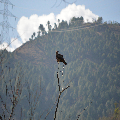

In [26]:
img = image.load_img('/content/test_data/test_data/bonegl/DSC_4589.jpg',target_size=(120,120))
img

In [28]:
# Testing 1
img1 = image.load_img('/content/test_data/test_data/blasti/DSC_6396.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 113ms/step
0
blasti


In [37]:
# Testing 2
img2 = image.load_img('/content/test_data/test_data/gretit/D72_0693.jpg',target_size=(120,120))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])
     

1/1 [==============================] - 0s 42ms/step
3
cbrtsh


**Model tuning (Adding feature extraction layers)**

In [40]:
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 36)      

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(train,batch_size=8,validation_data=test,epochs=15)

Epoch 1/15
19/19 [==============================] - 131s 7s/step - loss: 2.7169 - accuracy: 0.1067 - val_loss: 2.6991 - val_accuracy: 0.1210
Epoch 2/15
19/19 [==============================] - 127s 7s/step - loss: 2.5688 - accuracy: 0.1067 - val_loss: 2.6950 - val_accuracy: 0.0892
Epoch 3/15
19/19 [==============================] - 108s 6s/step - loss: 2.4756 - accuracy: 0.1867 - val_loss: 2.7902 - val_accuracy: 0.1083
Epoch 4/15
19/19 [==============================] - 107s 6s/step - loss: 2.4752 - accuracy: 0.2133 - val_loss: 2.7410 - val_accuracy: 0.0764
Epoch 5/15
19/19 [==============================] - 127s 7s/step - loss: 2.3566 - accuracy: 0.1800 - val_loss: 2.7622 - val_accuracy: 0.1847
Epoch 6/15
19/19 [==============================] - 107s 6s/step - loss: 2.2908 - accuracy: 0.2333 - val_loss: 2.8719 - val_accuracy: 0.1783
Epoch 7/15
19/19 [==============================] - 127s 7s/step - loss: 2.2043 - accuracy: 0.2800 - val_loss: 2.7584 - val_accuracy: 0.1592
Epoch 8/15
19

In [44]:
# Testing 1
img1 = image.load_img('/content/test_data/test_data/blasti/DSC_6396.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 99ms/step
0
blasti


In [45]:
# Testing 2
img2 = image.load_img('/content/test_data/test_data/gretit/D72_0693.jpg',target_size=(120,120))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 41ms/step
14
rebmig


**Model tuning (with dropout, batch normalization & early stopping)**

In [47]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [49]:
# Initializing the seq model
model = Sequential()
# Adding conv layer with input
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
# Normalizing the conv layer output
model.add(BatchNormalization())
# Selecting the max values
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropping the unwanted 20% of data
model.add(Dropout(0.2))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Hiddern layers
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
# Output layer
model.add(Dense(16,activation='softmax'))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 118, 118, 12)      336       
                                                                 
 batch_normalization_4 (Batc  (None, 118, 118, 12)     48        
 hNormalization)                                                 
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 59, 59, 12)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 59, 59, 12)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 57, 57, 24)        2616      
                                                                 
 batch_normalization_5 (Batc  (None, 57, 57, 24)      

In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [54]:
model.fit(train,batch_size=8,validation_data=test,epochs=10,callbacks=early_stop)

Epoch 1/10
19/19 [==============================] - 136s 7s/step - loss: 2.8085 - accuracy: 0.1200 - val_loss: 2.8254 - val_accuracy: 0.0573
Epoch 2/10
19/19 [==============================] - 106s 6s/step - loss: 2.6012 - accuracy: 0.1933 - val_loss: 3.2995 - val_accuracy: 0.0573
Epoch 3/10
19/19 [==============================] - 129s 7s/step - loss: 2.4630 - accuracy: 0.2467 - val_loss: 3.6567 - val_accuracy: 0.0573
Epoch 4/10
19/19 [==============================] - 128s 7s/step - loss: 2.2671 - accuracy: 0.3267 - val_loss: 3.7334 - val_accuracy: 0.0573
Epoch 5/10
19/19 [==============================] - 106s 6s/step - loss: 2.1665 - accuracy: 0.3533 - val_loss: 4.1367 - val_accuracy: 0.0573
Epoch 6/10
19/19 [==============================] - 108s 6s/step - loss: 2.1229 - accuracy: 0.3600 - val_loss: 4.3476 - val_accuracy: 0.0573
Epoch 7/10
19/19 [==============================] - 129s 7s/step - loss: 2.0820 - accuracy: 0.3733 - val_loss: 4.5106 - val_accuracy: 0.0573
Epoch 8/10
19

In [58]:
# Testing 1
img1 = image.load_img('/content/test_data/test_data/rebimg/100_5756.JPG',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 29ms/step
6
hilpig


In [59]:
# Testing 2
img2 = image.load_img('/content/test_data/test_data/hilpig/DSC_6359.jpg',target_size=(120,120))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 26ms/step
14
rebmig


In [63]:
# Testing 3
img3 = image.load_img('/content/test_data/test_data/jglowl/_D32_13515.jpg',target_size=(120,120))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
output = ['blasti', 'bongel', 'brhkyt', 'cbrtsh', 
          'cmnmyn', 'gretit', 'hilpig', 'himbul',
          'himgri', 'hsparo', 'indvul', 'jglowl',
          'lbicrw', 'mgprob', 'rebmig', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 27ms/step
14
rebmig


In [69]:
test_loss, test_accuracy = model.evaluate(test, steps=len(test))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

20/20 [==============================] - 59s 3s/step - loss: 4.8521 - accuracy: 0.0573
Test Loss: 4.8521
Test Accuracy: 0.0573
